In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
combined_df = pd.read_csv("JC-ALL-2023-citibike-tripdata.csv")

In [3]:
combined_df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,0905B18B365C9D20,classic_bike,2023-01-28 09:18:10,2023-01-28 09:28:52,Hoboken Terminal - Hudson St & Hudson Pl,HB101,Hamilton Park,JC009,40.735938,-74.030305,40.727596,-74.044247,member
1,1,B4F0562B05CB5404,electric_bike,2023-01-23 20:10:12,2023-01-23 20:18:27,Hoboken Terminal - Hudson St & Hudson Pl,HB101,Southwest Park - Jackson St & Observer Hwy,HB401,40.735938,-74.030305,40.737551,-74.041664,member
2,2,5ABF032895F5D87E,classic_bike,2023-01-29 15:27:04,2023-01-29 15:32:38,Hoboken Terminal - Hudson St & Hudson Pl,HB101,Marshall St & 2 St,HB408,40.735944,-74.030383,40.740802,-74.042521,member
3,3,E7E1F9C53976D2F9,classic_bike,2023-01-24 18:35:08,2023-01-24 18:42:13,Hoboken Terminal - Hudson St & Hudson Pl,HB101,Hamilton Park,JC009,40.735986,-74.030364,40.727596,-74.044247,member
4,4,323165780CA0734B,classic_bike,2023-01-21 20:44:09,2023-01-21 20:48:08,Hamilton Park,JC009,Manila & 1st,JC082,40.727596,-74.044247,40.721651,-74.042884,member


In [4]:
combined_df.describe

<bound method NDFrame.describe of         Unnamed: 0           ride_id  rideable_type           started_at  \
0                0  0905B18B365C9D20   classic_bike  2023-01-28 09:18:10   
1                1  B4F0562B05CB5404  electric_bike  2023-01-23 20:10:12   
2                2  5ABF032895F5D87E   classic_bike  2023-01-29 15:27:04   
3                3  E7E1F9C53976D2F9   classic_bike  2023-01-24 18:35:08   
4                4  323165780CA0734B   classic_bike  2023-01-21 20:44:09   
...            ...               ...            ...                  ...   
988846      988846  7E862701EE7A6A03   classic_bike  2023-12-20 17:55:41   
988847      988847  DFAF91AB91BE25DB   classic_bike  2023-12-13 14:36:43   
988848      988848  AEE7B49E6EDFAE6F   classic_bike  2023-12-18 16:40:00   
988849      988849  A38E98956AD72EFB   classic_bike  2023-12-02 13:42:51   
988850      988850  F16E0B969D877368   classic_bike  2023-12-19 16:30:13   

                   ended_at                        st

In [38]:
null_counts = combined_df.isnull().sum()

In [39]:
null_counts

Unnamed: 0            0
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [16]:
duplicate_rows = combined_df.duplicated().sum()

In [17]:
duplicate_rows

0

In [35]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985532 entries, 0 to 988850
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          985532 non-null  int64  
 1   ride_id             985532 non-null  object 
 2   rideable_type       985532 non-null  object 
 3   started_at          985532 non-null  object 
 4   ended_at            985532 non-null  object 
 5   start_station_name  985519 non-null  object 
 6   start_station_id    985519 non-null  object 
 7   end_station_name    985532 non-null  object 
 8   end_station_id      985532 non-null  object 
 9   start_lat           985532 non-null  float64
 10  start_lng           985532 non-null  float64
 11  end_lat             985532 non-null  float64
 12  end_lng             985532 non-null  float64
 13  member_casual       985532 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 112.8+ MB


In [23]:
combined_df[['end_station_name','end_station_id']].head()

,end_station_name,end_station_id
0,Hamilton Park,JC009
1,Southwest Park - Jackson St & Observer Hwy,HB401
2,Marshall St & 2 St,HB408
3,Hamilton Park,JC009
4,Manila & 1st,JC082


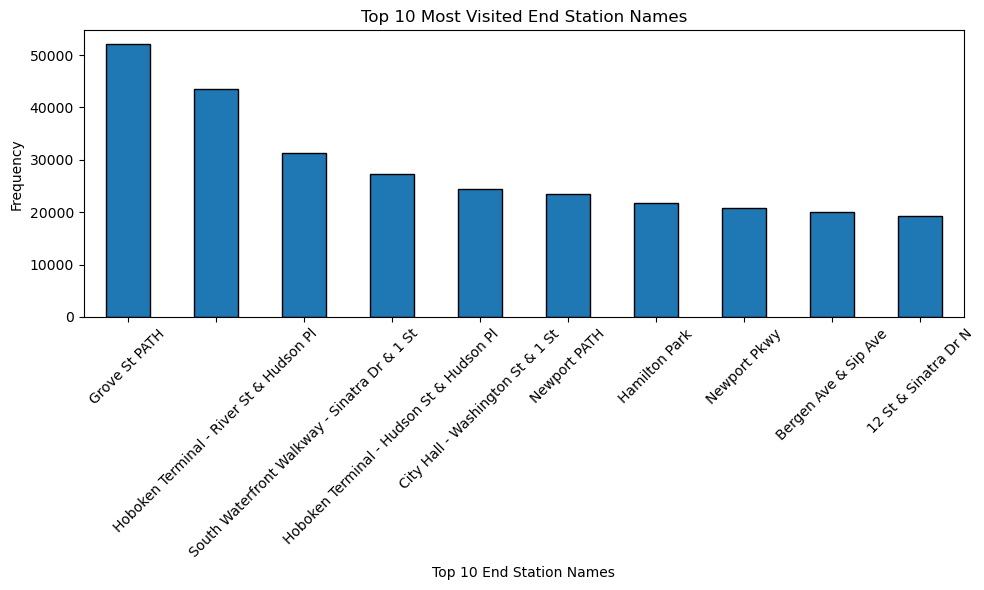

In [30]:

import matplotlib.pyplot as plt


# Assuming combined_df is your DataFrame
station_counts = combined_df['end_station_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
station_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Top 10 End Station Names')
plt.ylabel('Frequency')
plt.title('Top 10 Most Visited End Station Names')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [31]:
combined_df.dropna(subset=['end_station_name'], inplace=True)

In [32]:
combined_df.dropna(subset=['end_station_id'], inplace=True)

In [36]:
combined_df.dropna(subset=['start_station_name'], inplace=True)

In [37]:
combined_df.dropna(subset=['start_station_id'], inplace=True)

In [40]:
combined_df.shape

(985519, 14)

In [41]:
combined_df.to_csv("cleaned-ALL-2023-citibike-tripdata.csv")

In [43]:
combined_df['start_time'] = pd.to_datetime(combined_df['started_at'])
combined_df['end_time'] = pd.to_datetime(combined_df['ended_at'])

In [47]:
# Calculate trip duration in minutes
combined_df['trip_duration_minutes'] = (combined_df['start_time'] - combined_df['end_time']).dt.total_seconds() / 60
